In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import os
from IPython.display import Audio
from enum import Enum
from typing import List, Tuple
import re

%matplotlib inline

In [2]:
# Establish the numeric regex parser for sorting spectrograph files.

pattern = re.compile(r'\d+', flags=re.DOTALL)

In [3]:
# Let's start by first establishing our data paths.
audio_path = Path(os.getcwd()).parent / 'data' / 'genres_original'
print([d for d in list(audio_path.iterdir())[:5]])
print('+'*50)
spectrograph_path = Path(os.getcwd()).parent / 'data' / 'images_original'
print([d for d in list(spectrograph_path.iterdir())[:5]])

[PosixPath('/home/altafuturis/Masters/sem3/smdm/MoodSick/data/genres_original/pop'), PosixPath('/home/altafuturis/Masters/sem3/smdm/MoodSick/data/genres_original/disco'), PosixPath('/home/altafuturis/Masters/sem3/smdm/MoodSick/data/genres_original/rock'), PosixPath('/home/altafuturis/Masters/sem3/smdm/MoodSick/data/genres_original/metal'), PosixPath('/home/altafuturis/Masters/sem3/smdm/MoodSick/data/genres_original/blues')]
++++++++++++++++++++++++++++++++++++++++++++++++++
[PosixPath('/home/altafuturis/Masters/sem3/smdm/MoodSick/data/images_original/pop'), PosixPath('/home/altafuturis/Masters/sem3/smdm/MoodSick/data/images_original/disco'), PosixPath('/home/altafuturis/Masters/sem3/smdm/MoodSick/data/images_original/rock'), PosixPath('/home/altafuturis/Masters/sem3/smdm/MoodSick/data/images_original/metal'), PosixPath('/home/altafuturis/Masters/sem3/smdm/MoodSick/data/images_original/blues')]


In [4]:
# For ease of accessibility, we will create an enum for the genres.

GENRE = Enum('GENRE', list([d.name for d in audio_path.iterdir()]))

In [5]:
# Now, we map the audio and spectrographs to these enum values. Here, 'audio' refers to the path where the
# audio files are located, and 'spec' refers to the path where the spectrograph images are located.

GENRE_MAP = {
    GENRE[a.name]: {'audio': a, 'spec': s} for (a, s) in zip(audio_path.iterdir(), spectrograph_path.iterdir())
}

In [6]:
# Printing out an example of the resultant map. This makes retrieving genre-specific 
# data much easier with the ENUM key.

GENRE_MAP[GENRE.blues]

{'audio': PosixPath('/home/altafuturis/Masters/sem3/smdm/MoodSick/data/genres_original/blues'),
 'spec': PosixPath('/home/altafuturis/Masters/sem3/smdm/MoodSick/data/images_original/blues')}

In [7]:
# Let's design some audio and image helper functions.

def get_random_samples(genre: GENRE, n: int = 5) -> Tuple[np.ndarray, np.ndarray]:
    
    def custom_sorter(p: Path, file_type: str):
        assert file_type in ['audio', 'spec']
        if file_type == 'audio':
            # Uses *.00000**.wav
            return int(str(p.name).split('.')[1])
        
        # Otherwise, uses a **00000**.png
        return int(re.search(pattern, str(p.name)).group())
    
    # Reference all the music in the genre.
    audio_files = np.array(
        sorted(
            list(GENRE_MAP[genre]['audio'].glob('*.wav')),
            key=lambda x: custom_sorter(x, 'audio')
        )
    )
    
    spectrograph_files = np.array(
        sorted(
            list(GENRE_MAP[genre]['spec'].glob('*.png')),
            key=lambda x: custom_sorter(x, 'spec')
        )
    ) 
    
    # Sample `n` instances uniformly from both and return them.
    # But both will be sampled differently! To fix that, let's sample indices.
    random_ix = np.random.choice(np.arange(len(audio_files)), n, replace=False)
    
    return audio_files[random_ix], spectrograph_files[random_ix]


def play_audio(file: Path, print_info: bool = False):
    if print_info:
        print(f"Toggle to play {file.name}")
        
    display(Audio(file))

    
def plot_graphs(spec_paths: np.ndarray):
    # Unlike audio, we can easily clump the graphs.
    n = len(spec_paths)
    
    ncols = 2
    nrows = n//2 if n%2 == 0 else (n//2) + 1
    
    # Create the subplots.
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12))
    
    # Flatten the axes and iterate.
    for ix, ax in enumerate(axes.flat):
        if ix < n:
            # Use a context manager to close the fpath.
            with Image.open(spec_paths[ix], 'r') as im:
                ax.imshow(im)
                ax.set_title(f'Spectrograph for {spec_paths[ix].name}')
        else:
            ax.set_visible(False)

    plt.show()

In [8]:
# Sanity testing.
audio, specs = get_random_samples(GENRE.rock, 3)

for sample in audio:
    play_audio(sample, print_info=True)

Toggle to play rock.00089.wav


Toggle to play rock.00070.wav


Toggle to play rock.00068.wav


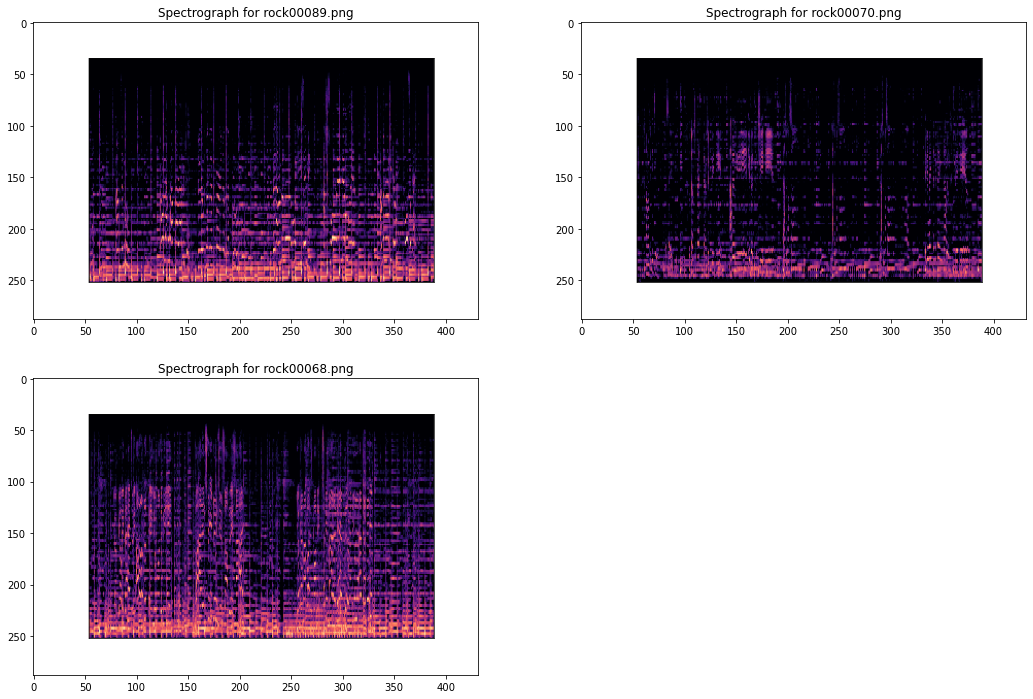

In [9]:
plot_graphs(specs)